In [1]:
%load_ext lab_black
%cd ..

/home/shim/cev/dl/motion-keypoint


In [2]:
import argparse
import json
import math
import sys
from pathlib import Path

import cv2
import imageio
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image
from sklearn.model_selection import KFold
from torch import nn, optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader
from tqdm import tqdm

import networks
import options
import utils
from datasets import get_det_dataset

from importlib import import_module
import matplotlib.pyplot as plt

In [3]:
main = import_module("main-effdet-train")

In [4]:
file_out_dir = Path("data/box_effdet3")

In [4]:
config = options.load_config_effdet("config/effdet-d8.yaml", write_log=False)

In [5]:
trainer = main.DetTrainer(config, 1)

Load pretrained /home/shim/.cache/torch/hub/checkpoints/efficientdet-d8.pth


In [7]:
trainer.test_loop('data/box_effdet3')

 47%|██████████████▏               | 755/1600 [00:36<00:40, 20.74it/s, 730-3-5-36-Z94_C-0000005.jpg]


IndexError: index 0 is out of bounds for axis 0 with size 0

## 왜 안되지??

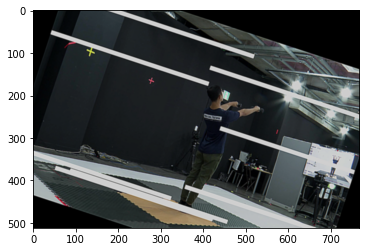

In [69]:
dl_valid_iter = trainer.dl_train.__iter__()
files, imgs, annots = next(dl_valid_iter)
img_np = utils.denormalize(imgs[0]).permute(1, 2, 0).mul(255).type(torch.uint8).numpy()
annot = annots[0]
plt.imshow(img_np)

In [9]:
int_annot = annot.type(torch.int64)[0]

In [10]:
int_annot

tensor([253, 225, 562, 388,   0])

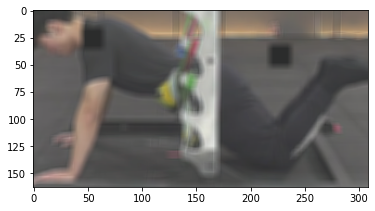

In [11]:
plt.imshow(img_np[int_annot[1] : int_annot[3], int_annot[0] : int_annot[2]])

In [12]:
pred_bboxes = trainer.det_model(imgs.cuda())

In [13]:
pred_bbox = pred_bboxes[0]["rois"][0]

In [14]:
int_bbox = pred_bbox.astype(np.int64)

In [15]:
int_bbox

array([236, 208, 404, 389])

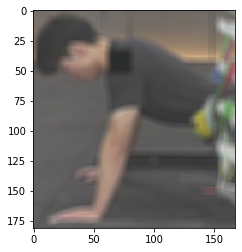

In [16]:
plt.imshow(img_np[int_bbox[1] : int_bbox[3], int_bbox[0] : int_bbox[2]])

## 테스트

In [102]:
dl_test_iter = trainer.dl_test.__iter__()

In [103]:
files, imgs = next(dl_test_iter)

In [104]:
img_np = utils.denormalize(imgs[0]).permute(1, 2, 0).mul(255).type(torch.uint8).numpy()

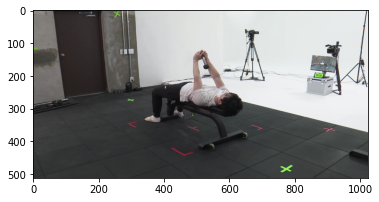

In [107]:
plt.imshow(img_np)

In [108]:
pred_bboxes = trainer.det_model(imgs.cuda())

In [109]:
pred_bbox = pred_bboxes[0]["rois"][0]

In [110]:
int_bbox = pred_bbox.astype(np.int64)

In [111]:
int_bbox

array([352, 126, 625, 340])

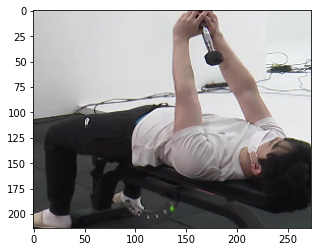

In [112]:
plt.imshow(img_np[int_bbox[1] : int_bbox[3], int_bbox[0] : int_bbox[2]])

In [114]:
trainer.ratio

(0.4740740740740741, 0.5333333333333333)

In [116]:
ori_bbox = pred_bbox.copy()

In [117]:
ori_bbox

array([352.72525, 126.08747, 625.94617, 340.7999 ], dtype=float32)

In [118]:
ori_bbox[0::2] = ori_bbox[0::2] / 1024 * 1920
ori_bbox[1::2] = ori_bbox[1::2] / 512 * 1080

In [119]:
ori_bbox

array([ 661.35986,  265.96576, 1173.649  ,  718.87476], dtype=float32)

In [120]:
int_ori_bbox = ori_bbox.astype(np.int64)

In [121]:
int_ori_bbox

array([ 661,  265, 1173,  718])

In [122]:
img_ori = imageio.imread(files[0])

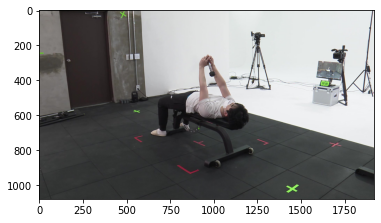

In [126]:
plt.imshow(img_ori)

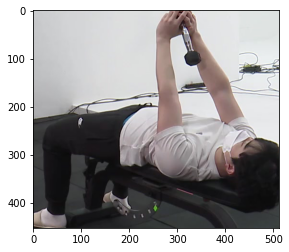

In [127]:
plt.imshow(img_ori[int_ori_bbox[1] : int_ori_bbox[3], int_ori_bbox[0] : int_ori_bbox[2]])